## Ridge and Lasso Regression

In [179]:
from sklearn.datasets import load_boston

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = load_boston()

In [182]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [183]:
datasets = pd.DataFrame(df.data)

In [184]:
datasets.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [185]:
datasets.columns = df.feature_names

In [186]:
datasets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [187]:
datasets['price'] = df.target

In [188]:
datasets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [189]:
X = datasets.drop(labels=['price'], axis=1)

In [190]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [191]:
y = datasets.iloc[:,13:]

In [192]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [193]:
X.shape

(506, 13)

In [194]:
y.shape

(506, 1)

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [196]:
linear_reggressor = LinearRegression()
mse = cross_val_score(linear_reggressor, X, y, scoring='neg_mean_squared_error', cv=5)

In [197]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [198]:
mse_mean = np.mean(mse)

In [199]:
mse_mean

-37.13180746769874

## Ridge Regression

In [200]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [201]:
ridge = Ridge()
paramater = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 25, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [202]:
ridge_regressor.best_params_

{'alpha': 100}

In [203]:
ridge_regressor.best_score_

-29.9057019475402

## Lasso Regression

In [204]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [205]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8, 1e-5,1e-3, 1e-2, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X,y)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4606.102953274618, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4350.835025660567, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483.8428946025883, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             scoring='neg_mean_squared_error')

In [206]:
lasso_regressor.best_params_

{'alpha': 1}

In [207]:
lasso_regressor.best_score_

-35.53158022069486

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [210]:
X_train.shape

(354, 13)

In [211]:
X_test.shape

(152, 13)

In [212]:
y_train.shape

(354, 1)

In [213]:
y_test.shape

(152, 1)

In [219]:
prediction_lasso = lasso_regressor.predict(X_test)

In [220]:
prediction_lasso

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

In [221]:
prediction_ridge = ridge_regressor.predict(X_test)

In [222]:
prediction_ridge

array([[23.96675946],
       [24.98996014],
       [27.5915891 ],
       [14.26059397],
       [19.63842944],
       [21.33417836],
       [21.32039718],
       [23.27239931],
       [20.30837677],
       [19.48226179],
       [ 6.4578138 ],
       [14.28838187],
       [18.59820449],
       [ 7.32675586],
       [36.99591747],
       [31.36360797],
       [22.27052891],
       [35.16096521],
       [30.99397818],
       [24.25137539],
       [25.40646048],
       [24.34913685],
       [20.21632652],
       [30.0992825 ],
       [22.68378433],
       [13.94885033],
       [18.64684143],
       [21.48729544],
       [33.26170271],
       [19.79217513],
       [18.17155893],
       [19.9695722 ],
       [20.42970393],
       [23.50528313],
       [28.90147149],
       [20.77821424],
       [11.23603614],
       [25.21197341],
       [16.33605596],
       [13.74459083],
       [24.96162953],
       [20.32082943],
       [21.56714797],
       [16.00431973],
       [22.631114  ],
       [24

<AxesSubplot:ylabel='Density'>

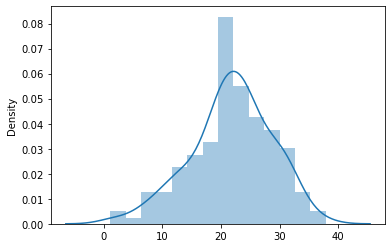

In [225]:
sns.distplot(prediction_lasso)

C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

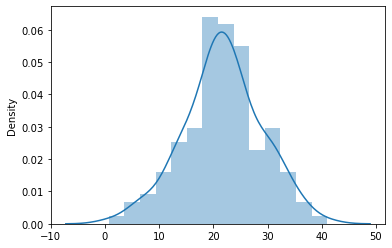

In [226]:
sns.distplot(prediction_ridge)